# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 2**

**Número do Grupo:**

**Alunos:**
1. Danilo Carneiro
2. Roger Rafael

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`.
- Análise de correlações entre variáveis e sua interpretação para a limpeza de datasets.
- Utilização de métodos de imputação de valores faltantes com a biblioteca `scikit-learn`.
- Transformação de variáveis categóricas utilizando a biblioteca `scikit-learn`.

---

Para os exercícios de **1** a **6**, utilizaremos o dataset **hepatitis.csv**.  A célula de código a seguir realizará o download destes dois datasets para o ambiente virtual do Google Colab.


In [2]:
# Download dos datasets para o ambiente virtual.
!wget -O hepatitis.csv "https://drive.google.com/uc?export=download&id=1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU"


--2023-09-14 17:23:17--  https://drive.google.com/uc?export=download&id=1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU
Resolving drive.google.com (drive.google.com)... 142.250.101.102, 142.250.101.113, 142.250.101.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/huespoguhf2qvg95i6jcqu8qi6h9ndk1/1694712150000/17263126637575785733/*/1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU?e=download&uuid=2146a4fb-0ed8-46c4-9d2b-9b5912729ad3 [following]
--2023-09-14 17:23:17--  https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/huespoguhf2qvg95i6jcqu8qi6h9ndk1/1694712150000/17263126637575785733/*/1hYkarxPr0snIl-W7VWM9OxZdsOfuUwsU?e=download&uuid=2146a4fb-0ed8-46c4-9d2b-9b5912729ad3
Resolving doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)... 142.251.2.132, 26

## Dataset **hepatitis.csv**

### Questão 01.

Carregue o dataset **hepatitis.csv** (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values='?'`.

In [36]:
# Imports
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Code
hepatitis = pd.read_csv('hepatitis.csv', na_values='?')
print(hepatitis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         

---
### Questão 02.
Realize uma análise exploratória inicial do dataset fornecido.

Para isso, você deve:

 - Apresente a quantidade de valores faltantes para cada variável do dataset.
 - Identifique o tipo de dado de cada uma das variáveis (se são numéricas ou categóricas).


> **ATENÇÃO: O pandas pode importar as variáveis com os tipos incorretos!**


In [60]:
missing = pd.DataFrame(hepatitis)
missingsum = pd.DataFrame.isna(hepatitis).sum()
print(missingsum)
print('Tipos de dados faltantes:')
print(missing.dtypes)

AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
Class               0
dtype: int64
Tipos de dados faltantes:
AGE                  int64
SEX                 object
STEROID             object
ANTIVIRALS          object
FATIGUE             object
MALAISE             object
ANOREXIA            object
LIVER_BIG           object
LIVER_FIRM          object
SPLEEN_PALPABLE     object
SPIDERS             object
ASCITES             object
VARICES             object
BILIRUBIN          float64
ALK_PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY           object
Class   



---

### Questão 03.

Realize o pré-processamento do dataset fornecido.

Para isso, você deve:


-   **Para as variáveis numéricas:** substitua os valores faltantes utilizando a estratégia de **média** (`sklearn.impute.SimpleImputer`).
-   **Para as variáveis categóricas:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`).

Por fim, apresente os resultados, comprovando que a imputação e transformações foram feitas corretamente.

In [64]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

col_num = hepatitis.select_dtypes(include=['number']).columns

imputer.fit_transform(hepatitis[col_num])

hepatitis[col_num] = imputer.transform(hepatitis[col_num])

#-----/\ númericas. \/ categóricas --------------------

imputer2 = SimpleImputer(strategy='most_frequent')

col_char = hepatitis.select_dtypes(include=['category', 'object']).columns

imputer2.fit(hepatitis[col_char])

hepatitis[col_char] = imputer2.transform(hepatitis[col_char])

print(hepatitis.isnull().sum())

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
Class              0
dtype: int64



---

### Questão 04.

Calcule a matriz de correlação somente das variáveis. Determine quantas variáveis poderemos descartar e identifique quais são elas.

In [66]:
hepatitis.corr()

<ipython-input-66-d1552ab789a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hepatitis.corr()


,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class
AGE,1.000000,0.122884,0.008076,0.081052,-0.246169,-0.153312,-0.219647
BILIRUBIN,0.122884,1.000000,0.157982,0.232610,-0.370712,-0.220977,-0.450470
ALK_PHOSPHATE,0.008076,0.157982,1.000000,0.193969,-0.338158,-0.189331,-0.141005
SGOT,0.081052,0.232610,0.193969,1.000000,-0.115455,-0.137698,-0.075579
ALBUMIN,-0.246169,-0.370712,-0.338158,-0.115455,1.000000,0.301497,0.465827
PROTIME,-0.153312,-0.220977,-0.189331,-0.137698,0.301497,1.000000,0.307238
Class,-0.219647,-0.450470,-0.141005,-0.075579,0.465827,0.307238,1.000000




---

### Questão 05.

Determine as 10 variáveis com menor correlação com a variável `Class` (`pandas.DataFrame.corr`).

Caso queiramos estudar a relação da variável `Class` com as outras variáveis, por que seria interessante desconsiderar essas 10 variáveis identificadas?

> Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

<ipython-input-86-56d2d88189bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = hepatitis.corr()


<Axes: >

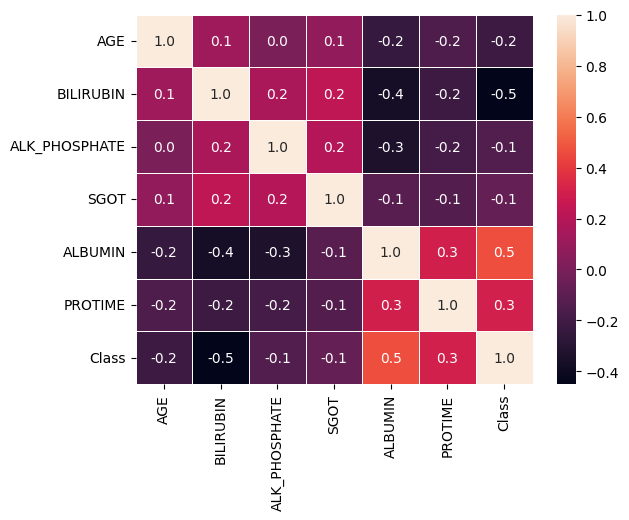

In [86]:
c = hepatitis.corr()
sns.heatmap(c, annot = True, fmt = "0.1f", linewidths=0.6)



---

### Questão 06.

Com as 10 varíaveis identificadas na questão anterior, crie um novo dataset que não contenha essas 10 váriaveis.

Apresente as 5 primeiras linhas do novo dataset criado.

> Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [89]:
hepatitis2 = hepatitis.drop(columns=['ALBUMIN','BILIRUBIN','PROTIME'])
print(hepatitis2)

      AGE     SEX STEROID ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER_BIG  \
0    30.0    male      no         no      no      no       no        no   
1    50.0  female      no         no     yes      no       no        no   
2    78.0  female     yes         no     yes      no       no       yes   
3    31.0  female     yes        yes      no      no       no       yes   
4    34.0  female     yes         no      no      no       no       yes   
..    ...     ...     ...        ...     ...     ...      ...       ...   
150  46.0  female     yes         no     yes     yes      yes       yes   
151  44.0  female     yes         no     yes      no       no       yes   
152  61.0  female      no         no     yes     yes       no        no   
153  53.0    male      no         no     yes      no       no       yes   
154  43.0  female     yes         no     yes      no       no       yes   

    LIVER_FIRM SPLEEN_PALPABLE SPIDERS ASCITES VARICES  ALK_PHOSPHATE   SGOT  \
0           no     